In [8]:
import requests

resp_jatim = requests.get('https://data.covid19.go.id/public/api/prov_detail_JAWA_TIMUR.json')
cov_jatim_raw = resp_jatim.json()

In [9]:
print(cov_jatim_raw)

{'last_date': '2021-04-21', 'provinsi': 'JAWA TIMUR', 'kasus_total': 145240, 'kasus_tanpa_tgl': 0, 'kasus_dengan_tgl': 145240, 'meninggal_persen': 7.168135499862297, 'meninggal_tanpa_tgl': 2, 'meninggal_dengan_tgl': 10409, 'sembuh_persen': 90.95910217570918, 'sembuh_tanpa_tgl': 5, 'sembuh_dengan_tgl': 132104, 'list_perkembangan': [{'tanggal': 1578441600000, 'KASUS': 9, 'MENINGGAL': 3, 'SEMBUH': 1, 'DIRAWAT_OR_ISOLASI': 5, 'AKUMULASI_KASUS': 9, 'AKUMULASI_SEMBUH': 1, 'AKUMULASI_MENINGGAL': 3, 'AKUMULASI_DIRAWAT_OR_ISOLASI': 5}, {'tanggal': 1578528000000, 'KASUS': 0, 'MENINGGAL': 1, 'SEMBUH': 23, 'DIRAWAT_OR_ISOLASI': -24, 'AKUMULASI_KASUS': 9, 'AKUMULASI_SEMBUH': 24, 'AKUMULASI_MENINGGAL': 4, 'AKUMULASI_DIRAWAT_OR_ISOLASI': -19}, {'tanggal': 1578614400000, 'KASUS': 0, 'MENINGGAL': 1, 'SEMBUH': 14, 'DIRAWAT_OR_ISOLASI': -15, 'AKUMULASI_KASUS': 9, 'AKUMULASI_SEMBUH': 38, 'AKUMULASI_MENINGGAL': 5, 'AKUMULASI_DIRAWAT_OR_ISOLASI': -34}, {'tanggal': 1578700800000, 'KASUS': 0, 'MENINGGAL': 3, 

In [10]:
import numpy as np
import pandas as pd

cov_jatim = pd.DataFrame(cov_jatim_raw['list_perkembangan'])
print('Info cov_jatim:\n', cov_jatim.info())
print('\nLima data teratas cov_jatim:\n', cov_jatim.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   tanggal                       470 non-null    int64
 1   KASUS                         470 non-null    int64
 2   MENINGGAL                     470 non-null    int64
 3   SEMBUH                        470 non-null    int64
 4   DIRAWAT_OR_ISOLASI            470 non-null    int64
 5   AKUMULASI_KASUS               470 non-null    int64
 6   AKUMULASI_SEMBUH              470 non-null    int64
 7   AKUMULASI_MENINGGAL           470 non-null    int64
 8   AKUMULASI_DIRAWAT_OR_ISOLASI  470 non-null    int64
dtypes: int64(9)
memory usage: 33.2 KB
Info cov_jatim:
 None

Lima data teratas cov_jatim:
          tanggal  KASUS  ...  AKUMULASI_MENINGGAL  AKUMULASI_DIRAWAT_OR_ISOLASI
0  1578441600000      9  ...                    3                             5
1  1578528000000 

In [11]:
cov_jatim_tidy = (cov_jatim.drop(columns=[item for item in cov_jatim.columns 
                                               if 'DIRAWAT' in item])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jatim_tidy['tanggal'] = pd.to_datetime(cov_jatim_tidy['tanggal']*1e6, unit='ns')
print('Lima data teratas:\n', cov_jatim_tidy.head())

Lima data teratas:
      tanggal  kasus_baru  ...  akumulasi_sembuh  akumulasi_meninggal
0 2020-01-08           9  ...                 1                    3
1 2020-01-09           0  ...                24                    4
2 2020-01-10           0  ...                38                    5
3 2020-01-11           0  ...                46                    8
4 2020-01-12           0  ...                47                   11

[5 rows x 7 columns]


<Figure size 432x288 with 0 Axes>

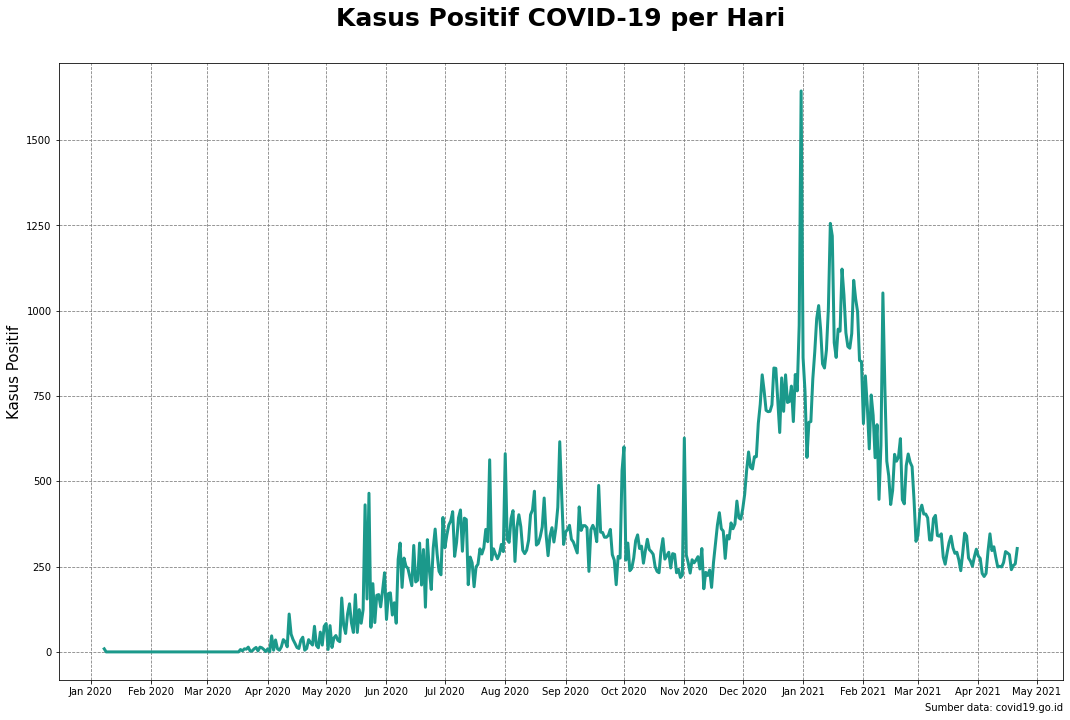

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(15,10))
ax.plot('tanggal', 'kasus_baru', data=cov_jatim_tidy, lw=3, color = '#1b998b')

ax.set_title('Kasus Positif COVID-19 per Hari', fontsize=25, fontweight='bold', y=1.05)
ax.set_xlabel('')
ax.set_ylabel('Kasus Positif', fontsize=15)
ax.text(1, -0.05, 'Sumber data: covid19.go.id', color='black', ha='right', transform=ax.transAxes)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(color='grey', linestyle='dashed')
plt.tight_layout()
plt.show()

In [13]:
print(cov_jatim_tidy.loc[cov_jatim_tidy['kasus_baru'].idxmax()])
print('\n', cov_jatim_tidy[['kasus_baru', 'meninggal', 'sembuh']].max())

tanggal                2020-12-31 00:00:00
kasus_baru                            1644
meninggal                              163
sembuh                                1258
akumulasi_kasus                      84412
akumulasi_sembuh                     75042
akumulasi_meninggal                   6401
Name: 358, dtype: object

 kasus_baru    1644
meninggal      163
sembuh        1258
dtype: int64


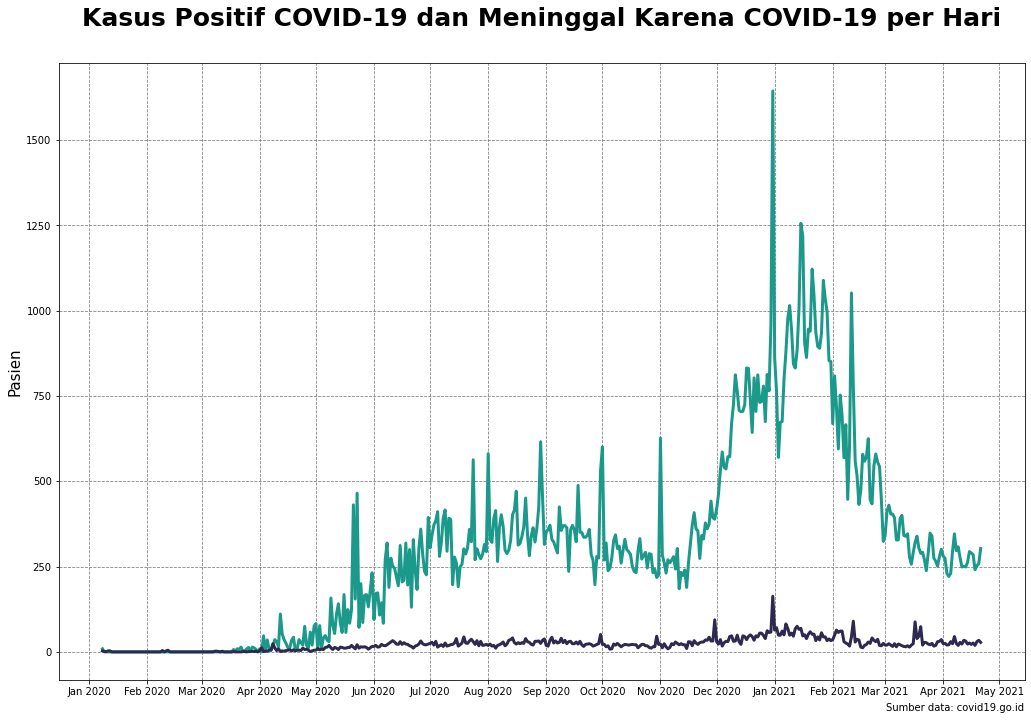

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot('tanggal', 'kasus_baru', data=cov_jatim_tidy, lw=3, color = '#1b998b', label = 'Positif Covid-19')
ax.plot('tanggal', 'meninggal', data=cov_jatim_tidy, lw=3, color = '#2e294e', label = 'Meninggal Karena Covid-19')

ax.set_title('Kasus Positif COVID-19 dan Meninggal Karena COVID-19 per Hari', fontsize=25, y=1.05, fontweight='bold')
ax.set_xlabel('')
ax.set_ylabel('Pasien', fontsize=15)
ax.text(1, -0.05, 'Sumber data: covid19.go.id', color='black', ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(color='grey', linestyle='dashed')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

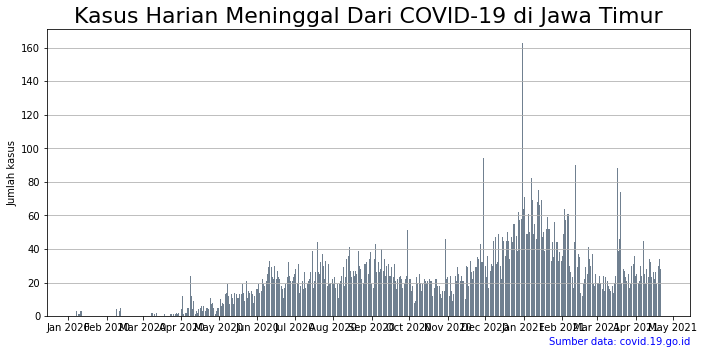

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jatim_tidy, x='tanggal', height='meninggal', color='slategrey')
ax.set_title('Kasus Harian Meninggal Dari COVID-19 di Jawa Timur',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [16]:
cov_jatim_pekanan = (cov_jatim_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jatim_pekanan['tahun'] = cov_jatim_pekanan['tanggal'].apply(lambda x: x.year)
cov_jatim_pekanan['pekan_ke'] = cov_jatim_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jatim_pekanan = cov_jatim_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jabar_pekanan:')
print(cov_jatim_pekanan.info())
print('\nLima data teratas cov_jabar_pekanan:\n', cov_jatim_pekanan.head())

Info cov_jabar_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     68 non-null     int64
 1   pekan_ke  68 non-null     int64
 2   jumlah    68 non-null     int64
dtypes: int64(3)
memory usage: 1.7 KB
None

Lima data teratas cov_jabar_pekanan:
    tahun  pekan_ke  jumlah
0   2020         2       9
1   2020         3       0
2   2020         4       0
3   2020         5       0
4   2020         6       0


In [17]:
cov_jatim_pekanan['jumlah_pekanlalu'] = cov_jatim_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jatim_pekanan['lebih_baik'] = cov_jatim_pekanan['jumlah'] < cov_jatim_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_jatim_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020         2       9                 0       False
1   2020         3       0                 9        True
2   2020         4       0                 0       False
3   2020         5       0                 0       False
4   2020         6       0                 0       False
5   2020         7       0                 0       False
6   2020         8       0                 0       False
7   2020         9       0                 0       False
8   2020        10       0                 0       False
9   2020        11       0                 0       False


<Figure size 432x288 with 0 Axes>

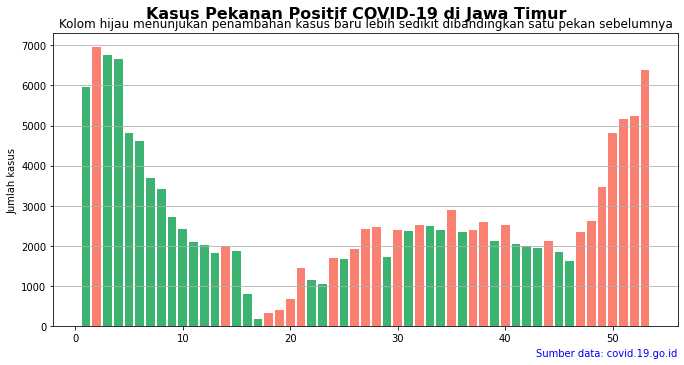

In [18]:
import matplotlib.pyplot as plt

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(data=cov_jatim_pekanan, x='pekan_ke', height='jumlah', 
       color=['mediumseagreen' if x is True else 'salmon' for x in cov_jatim_pekanan['lebih_baik']])
fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Timur', 
             y=1.00, fontsize=16, fontweight='bold', ha='center')
ax.set_title('Kolom hijau menunjukan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
             fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('Jumlah kasus')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)
		
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [19]:
cov_jatim_tidy['akumulasi_aktif'] = (cov_jatim_tidy['kasus_baru'] - cov_jatim_tidy['sembuh'] - cov_jatim_tidy['meninggal']).cumsum()
print(cov_jatim_tidy.head())
print(cov_jatim_tidy.info())

     tanggal  kasus_baru  ...  akumulasi_meninggal  akumulasi_aktif
0 2020-01-08           9  ...                    3                5
1 2020-01-09           0  ...                    4              -19
2 2020-01-10           0  ...                    5              -34
3 2020-01-11           0  ...                    8              -45
4 2020-01-12           0  ...                   11              -49

[5 rows x 8 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   tanggal              470 non-null    datetime64[ns]
 1   kasus_baru           470 non-null    int64         
 2   meninggal            470 non-null    int64         
 3   sembuh               470 non-null    int64         
 4   akumulasi_kasus      470 non-null    int64         
 5   akumulasi_sembuh     470 non-null    int64         
 6   akumu

In [20]:
cov_jatim_tidy[['akumulasi_kasus', 'akumulasi_aktif']]

,akumulasi_kasus,akumulasi_aktif
0,9,5
1,9,-19
2,9,-34
3,9,-45
4,9,-49
...,...,...
465,144185,2683
466,144426,2681
467,144679,2669
468,144937,2681


<Figure size 432x288 with 0 Axes>

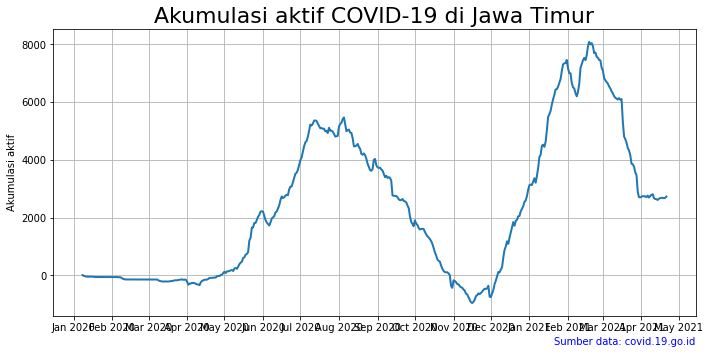

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
ax.plot('tanggal', 'akumulasi_aktif', data=cov_jatim_tidy, lw=2)

ax.set_title('Akumulasi aktif COVID-19 di Jawa Timur',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.grid()
plt.tight_layout()
plt.show()

In [22]:
a = cov_jatim_tidy['akumulasi_aktif'].min()
cov_jatim_tidy[(cov_jatim_tidy['akumulasi_aktif']==a)]

,tanggal,kasus_baru,meninggal,sembuh,akumulasi_kasus,akumulasi_sembuh,akumulasi_meninggal,akumulasi_aktif
313,2020-11-16,263,30,259,56822,53246,4538,-962


<Figure size 432x288 with 0 Axes>

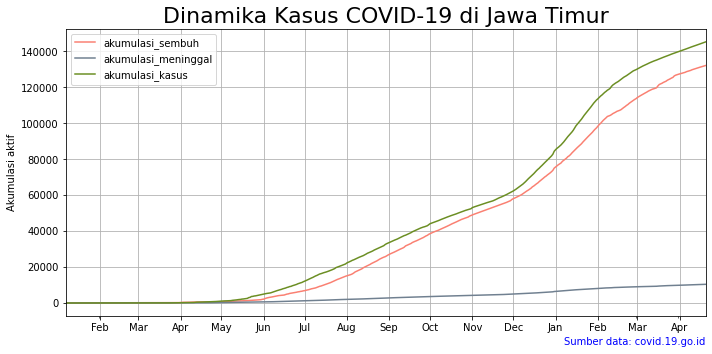

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.clf()
fig, ax = plt.subplots(figsize=(10,5))
cov_jatim_tidy.set_index('tanggal')[['akumulasi_sembuh', 'akumulasi_meninggal', 'akumulasi_kasus']].plot.line(ax=ax, color=['salmon', 'slategrey', 'olivedrab'])

ax.set_title('Dinamika Kasus COVID-19 di Jawa Timur',
             fontsize=22)
ax.set_xlabel('')
ax.set_ylabel('Akumulasi aktif')
ax.text(1, -0.1, 'Sumber data: covid.19.go.id', color='blue',
        ha='right', transform=ax.transAxes)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.grid()
plt.tight_layout()
plt.show()